http://tech.nitoyon.com/en/blog/2013/11/07/k-means/

In [1]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [8]:
digits.data[1].reshape(8,8)

array([[  0.,   0.,   0.,  12.,  13.,   5.,   0.,   0.],
       [  0.,   0.,   0.,  11.,  16.,   9.,   0.,   0.],
       [  0.,   0.,   3.,  15.,  16.,   6.,   0.,   0.],
       [  0.,   7.,  15.,  16.,  16.,   2.,   0.,   0.],
       [  0.,   0.,   1.,  16.,  16.,   3.,   0.,   0.],
       [  0.,   0.,   1.,  16.,  16.,   6.,   0.,   0.],
       [  0.,   0.,   1.,  16.,  16.,   6.,   0.,   0.],
       [  0.,   0.,   0.,  11.,  16.,  10.,   0.,   0.]])

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

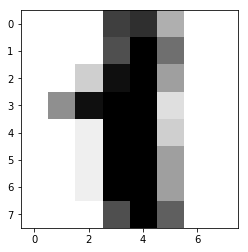

In [7]:
plt.imshow(digits.data[1].reshape(8,8),cmap=plt.cm.binary)

In [9]:
from sklearn.cluster import KMeans

In [10]:
kmeans = KMeans(n_clusters=10, random_state=0)

In [11]:
kmeans.fit(digits.data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [17]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [14]:
clusters = kmeans.predict(digits.data)

In [16]:
clusters

array([5, 7, 7, ..., 7, 3, 3])

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

-2159057.29104
-1914619.61755
-1730184.70254
-1609622.17713
-1517377.39148
-1405060.98976
-1336524.36625
-1264975.58338
-1202276.482
-1165177.71371
-1131861.18509
-1103446.19924
-1070418.98134
-1046178.52557
-1024302.18353
-999621.016255
-992176.698273
-969299.766734
-958192.681217


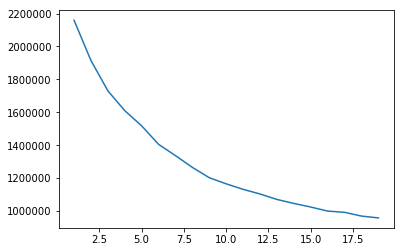

In [19]:
cost = []
for i in range(1,20):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(digits.data)
    print (kmeans.score(digits.data))
    cost.append(-1 * kmeans.score(digits.data))
                
plt.plot(range(1,20),cost)
#Now, we see after ten clusters, the cost doesn't reduces drastically.
#So, we choose 10 as optimum clusters

In [21]:
import numpy as np
#Gives the indexes of all the data that belongs to cluster 5
ind5 = np.where(clusters == 5)

In [22]:
ind5
#indexes which belongs to cluster 5

(array([   0,   10,   20,   30,   36,   48,   49,   55,   72,   78,   79,
         101,  126,  130,  140,  150,  160,  166,  178,  179,  185,  202,
         208,  209,  229,  252,  256,  266,  276,  286,  292,  304,  305,
         311,  328,  334,  335,  357,  382,  386,  396,  406,  416,  422,
         434,  435,  441,  458,  464,  465,  487,  512,  516,  526,  536,
         546,  552,  564,  565,  571,  588,  594,  595,  617,  642,  646,
         656,  666,  676,  682,  694,  695,  701,  718,  724,  725,  747,
         772,  776,  786,  792,  796,  806,  812,  824,  825,  831,  848,
         854,  855,  877,  902,  915,  925,  935,  941,  957,  974,  980,
         981, 1002, 1025, 1029, 1039, 1049, 1059, 1065, 1077, 1078, 1082,
        1099, 1105, 1106, 1128, 1153, 1157, 1167, 1177, 1187, 1193, 1205,
        1206, 1212, 1229, 1235, 1236, 1258, 1283, 1287, 1297, 1307, 1317,
        1323, 1335, 1336, 1342, 1359, 1365, 1366, 1388, 1413, 1415, 1425,
        1435, 1445, 1451, 1463, 1464, 

In [23]:
digits.target[ind5]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [24]:
from scipy.stats import mode

mode(digits.target[ind5])


ModeResult(mode=array([3]), count=array([250]))

In [20]:
from scipy.stats import mode
mode([1,1,1,1,1,6])

ModeResult(mode=array([1]), count=array([5]))

In [17]:
predict[ind5] = mode(digits.target[ind5])[0]

ModeResult(mode=array([0]), count=array([177]))

In [11]:
kmeans.cluster_centers_.shape

(10, 64)

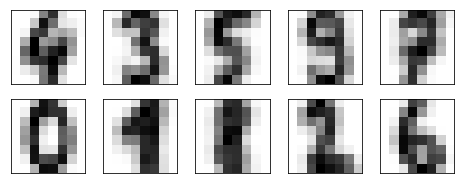

In [12]:
#Plotting the centroids of the centers
import matplotlib.pyplot as plt
%matplotlib inline 

fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)

for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [17]:
digits.data[1]

array([  0.,   0.,   0.,  12.,  13.,   5.,   0.,   0.,   0.,   0.,   0.,
        11.,  16.,   9.,   0.,   0.,   0.,   0.,   3.,  15.,  16.,   6.,
         0.,   0.,   0.,   7.,  15.,  16.,  16.,   2.,   0.,   0.,   0.,
         0.,   1.,  16.,  16.,   3.,   0.,   0.,   0.,   0.,   1.,  16.,
        16.,   6.,   0.,   0.,   0.,   0.,   1.,  16.,  16.,   6.,   0.,
         0.,   0.,   0.,   0.,  11.,  16.,  10.,   0.,   0.])

In [18]:
digits.target[18]

8

In [19]:
clusters[2]

7

In [20]:
kmeans.predict(digits.data[[0]])

array([5])

In [26]:
digits.target[77]

2

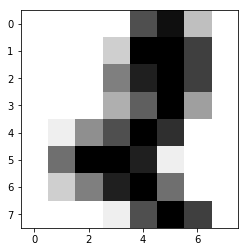

In [28]:
plt.imshow(digits.data[77].reshape(8,8), interpolation='nearest', cmap=plt.cm.binary)

In [25]:
predict = kmeans.predict(digits.data)

In [26]:
digits.data[predict == 7].shape

(224, 64)

In [27]:
import pandas as pd

In [28]:
df = pd.DataFrame(predict,columns=['cluster'])

In [29]:
d = df.groupby('cluster')

In [30]:
import numpy as np
np.where(predict == 7)

(array([   1,    2,   18,   28,   38,   40,   50,   51,   53,   57,   69,
          76,   93,   95,   96,   99,  114,  115,  116,  122,  123,  127,
         129,  138,  148,  158,  168,  170,  183,  198,  206,  224,  238,
         242,  248,  249,  253,  255,  257,  267,  274,  277,  284,  294,
         296,  298,  303,  326,  336,  341,  346,  349,  352,  355,  363,
         383,  404,  462,  492,  502,  508,  509,  524,  534,  544,  547,
         554,  556,  592,  612,  615,  630,  639,  643,  645,  647,  657,
         664,  667,  684,  688,  693,  699,  700,  702,  716,  726,  731,
         736,  739,  742,  745,  753,  760,  769,  775,  777,  787,  797,
         804,  818,  823,  846,  852,  856,  861,  866,  869,  875,  883,
         903,  905, 1030, 1040, 1047, 1050, 1069, 1071, 1076, 1080, 1083,
        1097, 1107, 1112, 1117, 1120, 1123, 1126, 1134, 1141, 1154, 1156,
        1175, 1178, 1185, 1199, 1204, 1213, 1227, 1237, 1242, 1247, 1250,
        1253, 1256, 1279, 1280, 1284, 

In [51]:
digits.target[1286]

8

In [52]:
from sklearn.metrics import accuracy_score

In [54]:
from scipy.stats import mode

In [55]:
labels = np.zeros_like(predict)

In [56]:
for i in range(10):
    mask = (predict == i)
    labels[mask] = mode(digits.target[mask][0])

C:\Users\ZekeLabs\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: assignment will raise an error in the future, most likely because your index result shape does not match the value array shape. You can use `arr.flat[index] = values` to keep the old behaviour.
  This is separate from the ipykernel package so we can avoid doing imports until


In [57]:
labels

array([0, 1, 1, ..., 1, 5, 1])

In [58]:
predict == 0

array([False, False, False, ..., False, False, False], dtype=bool)

In [60]:
accuracy_score(digits.target, labels)

0.42737896494156929

### k-means for color compression

In [25]:
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")

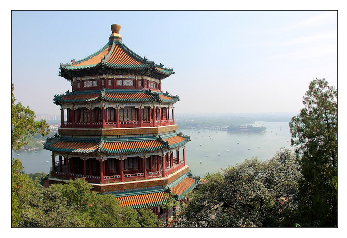

In [13]:
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(china);

In [26]:
china.shape

(427, 640, 3)

In [18]:
china

array([[[174, 201, 231],
        [174, 201, 231],
        [174, 201, 231],
        ..., 
        [250, 251, 255],
        [250, 251, 255],
        [250, 251, 255]],

       [[172, 199, 229],
        [173, 200, 230],
        [173, 200, 230],
        ..., 
        [251, 252, 255],
        [251, 252, 255],
        [251, 252, 255]],

       [[174, 201, 231],
        [174, 201, 231],
        [174, 201, 231],
        ..., 
        [252, 253, 255],
        [252, 253, 255],
        [252, 253, 255]],

       ..., 
       [[ 88,  80,   7],
        [147, 138,  69],
        [122, 116,  38],
        ..., 
        [ 39,  42,  33],
        [  8,  14,   2],
        [  6,  12,   0]],

       [[122, 112,  41],
        [129, 120,  53],
        [118, 112,  36],
        ..., 
        [  9,  12,   3],
        [  9,  15,   3],
        [ 16,  24,   9]],

       [[116, 103,  35],
        [104,  93,  31],
        [108, 102,  28],
        ..., 
        [ 43,  49,  39],
        [ 13,  21,   6],
        [ 15,  24,

In [27]:
#Image processing works better with each value between 0 & 1, thus div by 255
data = china/255.0

In [28]:
data = data.reshape(427*640,3)

In [30]:
data.shape

(273280, 3)

In [31]:
img_kmeans = KMeans(n_clusters=3, random_state=0)

In [32]:
img_kmeans.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [33]:
img_kmeans.predict(data)

array([2, 2, 2, ..., 1, 1, 1])

In [21]:
img_kmeans.cluster_centers_[[1,1]]

array([[ 0.17961235,  0.15837368,  0.11034106],
       [ 0.17961235,  0.15837368,  0.11034106]])

In [36]:
img_kmeans.cluster_centers_

array([[ 0.5218236 ,  0.48116951,  0.38010626],
       [ 0.17961235,  0.15837368,  0.11034106],
       [ 0.84166988,  0.88037133,  0.92039203]])

In [22]:
new_colors = img_kmeans.cluster_centers_[img_kmeans.predict(data)]

In [23]:
new_colors

array([[ 0.84166988,  0.88037133,  0.92039203],
       [ 0.84166988,  0.88037133,  0.92039203],
       [ 0.84166988,  0.88037133,  0.92039203],
       ..., 
       [ 0.17961235,  0.15837368,  0.11034106],
       [ 0.17961235,  0.15837368,  0.11034106],
       [ 0.17961235,  0.15837368,  0.11034106]])

In [24]:
china_recolored = new_colors.reshape(china.shape)

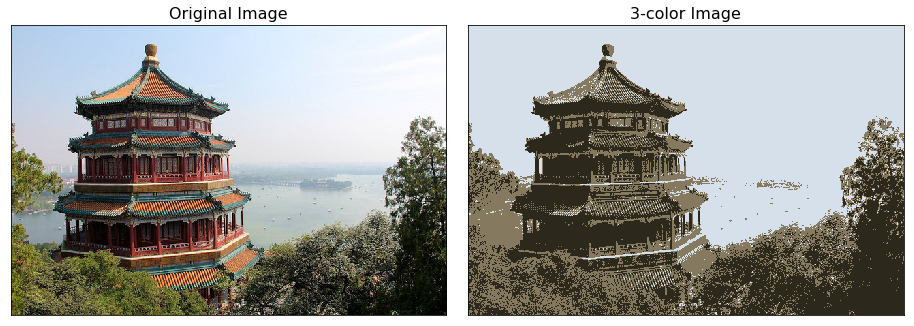

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(china_recolored)
ax[1].set_title('3-color Image', size=16);

In [45]:
import numpy as np
a = np.array([11,33,44,66,88])

In [47]:
a[[1,2,1,2,1,2,1,2,1,2,1,2,1,2,1,2]]

array([33, 44, 33, 44, 33, 44, 33, 44, 33, 44, 33, 44, 33, 44, 33, 44])

In [26]:
from sklearn.datasets import load_wine
wine = load_wine()

In [31]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [32]:
model = KMeans(n_clusters=3, random_state=0)

In [33]:
model.fit(wine.data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [34]:
pred = model.predict(wine.data)

In [35]:
model.cluster_centers_

array([[  1.29298387e+01,   2.50403226e+00,   2.40806452e+00,
          1.98903226e+01,   1.03596774e+02,   2.11112903e+00,
          1.58403226e+00,   3.88387097e-01,   1.50338710e+00,
          5.65032258e+00,   8.83967742e-01,   2.36548387e+00,
          7.28338710e+02],
       [  1.38044681e+01,   1.88340426e+00,   2.42617021e+00,
          1.70234043e+01,   1.05510638e+02,   2.86723404e+00,
          3.01425532e+00,   2.85319149e-01,   1.91042553e+00,
          5.70255319e+00,   1.07829787e+00,   3.11404255e+00,
          1.19514894e+03],
       [  1.25166667e+01,   2.49420290e+00,   2.28855072e+00,
          2.08231884e+01,   9.23478261e+01,   2.07072464e+00,
          1.75840580e+00,   3.90144928e-01,   1.45188406e+00,
          4.08695651e+00,   9.41159420e-01,   2.49072464e+00,
          4.58231884e+02]])

In [36]:
pred

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0,
       0, 0, 2, 2, 1, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2,
       2, 2, 2, 0, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2,
       2, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2,
       0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [39]:
from scipy.stats import mode
help(mode)

Help on function mode in module scipy.stats.stats:

mode(a, axis=0, nan_policy='propagate')
    Returns an array of the modal (most common) value in the passed array.
    
    If there is more than one such value, only the smallest is returned.
    The bin-count for the modal bins is also returned.
    
    Parameters
    ----------
    a : array_like
        n-dimensional array of which to find mode(s).
    axis : int or None, optional
        Axis along which to operate. Default is 0. If None, compute over
        the whole array `a`.
    nan_policy : {'propagate', 'raise', 'omit'}, optional
        Defines how to handle when input contains nan. 'propagate' returns nan,
        'raise' throws an error, 'omit' performs the calculations ignoring nan
        values. Default is 'propagate'.
    
    Returns
    -------
    mode : ndarray
        Array of modal values.
    count : ndarray
        Array of counts for each mode.
    
    Examples
    --------
    >>> a = np.array([[6, 8, 3,